In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [42]:
df_train.LotS

(1460, 81)

In [47]:
def mostrar_información(df, column):
    print("------------------------------------")
    print("Type:")
    print(type(df[column][0]))
    print("------------------------------------")
    print("Describe:")
    print(df[column].describe())
    print("------------------------------------")
    print("Unique:")
    print(df[column].value_counts())
    print("------------------------------------")
    print("Random values:")
    sample_values = df[column].sample(n=15)
    print(sample_values)
    print("------------------------------------")

------------------------------------
Type:
<class 'numpy.int64'>
------------------------------------
Describe:
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
------------------------------------
Unique:
OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64
------------------------------------
Random values:
1270    6
1387    7
626     5
871     5
597     5
174     5
212     5
498     7
1003    6
1185    7
740     7
1388    5
1113    7
970     4
44      6
Name: OverallCond, dtype: int64
------------------------------------


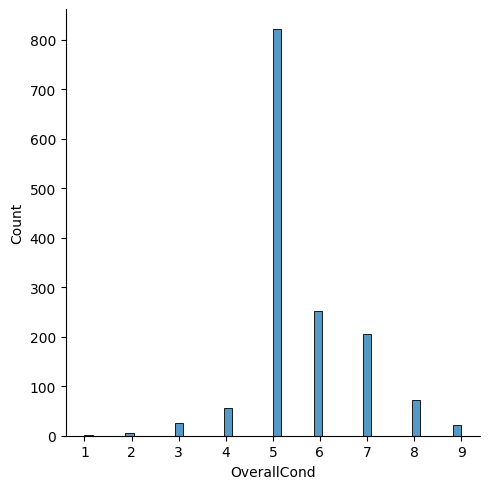

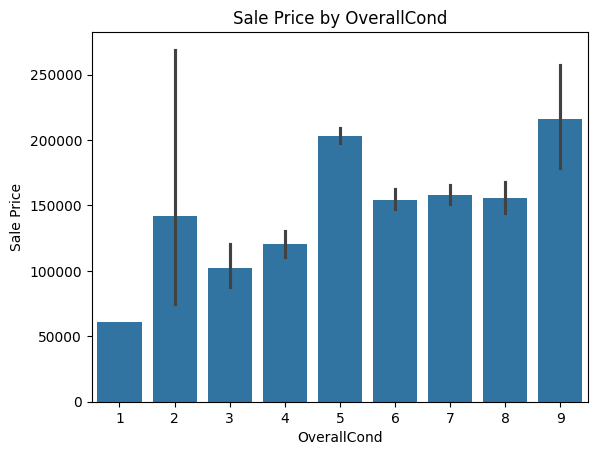

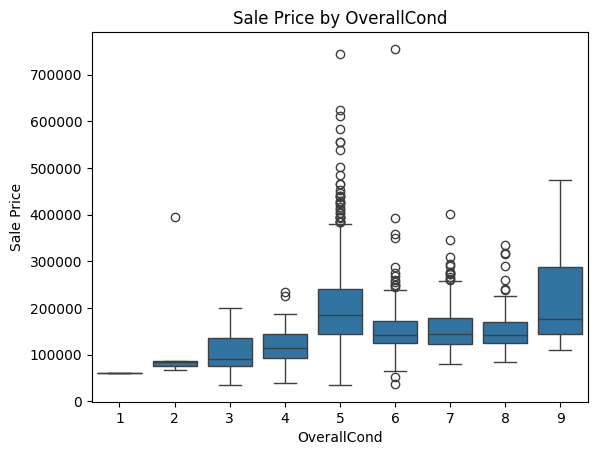

Se puede observar que PavedDrive es una variable con distribución desbalanceada, donde la mayoría de las casas tienen un PavedDrive de tipo Y, seguido de tipo N y P. Además, se puede observar que las casas con PavedDrive de tipo Y tienen un precio de venta más alto que las casas con PavedDrive de tipo N y P. 


In [179]:
varaible = 'OverallCond'
x_ = df_train[varaible]
y_ = df_train['SalePrice']
mostrar_información(df_train, varaible)
#distribución de la variable x graficamente:
sns.displot(x_)
plt.show()
sns.barplot(x=x_, y=y_)
plt.xlabel(x_.name)
plt.ylabel('Sale Price')
plt.title('Sale Price by ' + x_.name)
plt.show()
sns.boxplot(x=x_, y=y_)
plt.xlabel(x_.name)
plt.ylabel('Sale Price')
plt.title('Sale Price by ' + x_.name)
plt.show()


print("Se puede observar que PavedDrive es una variable con distribución desbalanceada, donde la mayoría de las casas tienen un PavedDrive de tipo Y, seguido de tipo N y P. Además, se puede observar que las casas con PavedDrive de tipo Y tienen un precio de venta más alto que las casas con PavedDrive de tipo N y P. ")

------------------------------------
Type:
<class 'numpy.int64'>
------------------------------------
Describe:
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64
------------------------------------
Unique:
YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1913     1
2010     1
1893     1
1906     1
Name: count, Length: 112, dtype: int64
------------------------------------
Random values:
1367    1977
64      1997
292     1949
477     2006
1399    1925
524     1996
1433    2000
36      1994
1135    1926
803     2008
12      1962
447     1998
310     1993
850     2003
143     1999
Name: YearBuilt, dtype: int64
------------------------------------


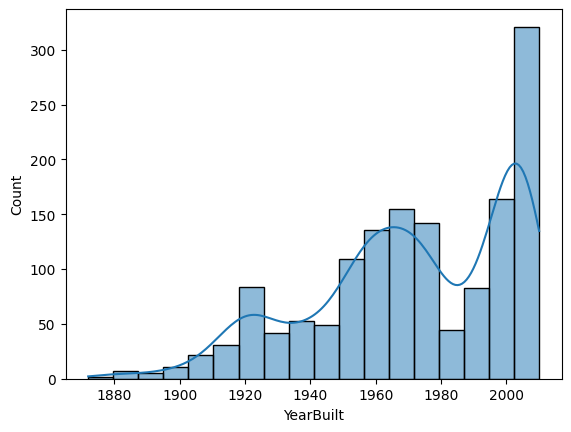

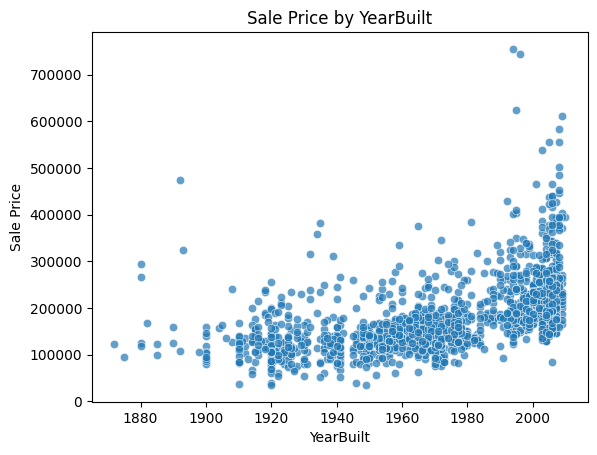

Se puede observar que WoodDeckSF es una variable con distribución desbalanceada, donde la mayoría de las casas no tienen deck de madera. Además, se puede observar que las casas con deck de madera tienen un precio de venta más alto que las casas sin deck de madera.


In [176]:
varaible = 'YearBuilt'
x_ = df_train[varaible]
y_ = df_train['SalePrice']
mostrar_información(df_train, varaible)
#distribución de la variable x graficamente:
sns.histplot(x_,kde=True,legend=True)
plt.show()
#scater plot con lineas de regresión

sns.scatterplot(x=x_, y=y_,alpha=0.7)
plt.xlabel(x_.name)
plt.ylabel('Sale Price')
plt.title('Sale Price by ' + x_.name)
plt.show()

print("Se puede observar que WoodDeckSF es una variable con distribución desbalanceada, donde la mayoría de las casas no tienen deck de madera. Además, se puede observar que las casas con deck de madera tienen un precio de venta más alto que las casas sin deck de madera.")

In [31]:
type(df_train.Alley[0])

float

In [33]:
df_train['Alley'].describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

In [24]:
df_train['GrLivArea'].describe()


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64